# **TE1 TARP PROJECT**

In [3]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 281.8 kB/s eta 0:02:15
   ---------------------------------------- 0.0/38.1 MB 281.8 kB/s eta 0:02:15
   ---------------------------------------- 0.1/38.1 MB 280.5 kB/s eta 0:02:16
   ---------------------------------------- 0.1/38.1 MB 364.4 kB/s eta 0:01:45
   ---------------------------------------- 0.2/38.1 MB 437.1 kB/s eta 0:01:27
   ---------------------------------------- 0.2/38.1 MB 456.4 kB/s eta 0:01:24
   ---------------------------------------- 0.2/38.1 MB 492.1 kB/s eta 0:01:17
   -------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

%matplotlib inline

In [2]:
labels_df = pd.read_csv('labels.csv')
labels = np.array(labels_df[' hemorrhage'].tolist())

files = sorted(glob.glob('../input/head_ct/head_ct/*.png'))
images = np.array([cv2.imread(path) for path in files])

# data exploration

<Axes: >

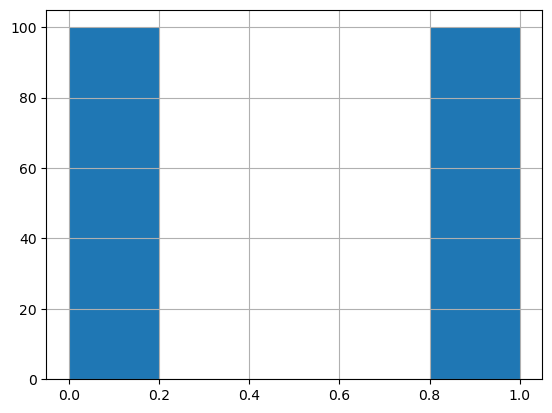

In [3]:
labels_df[' hemorrhage'].hist(bins=5)

The dataset contains head CTs which are equally likely of getting Brain Haemorrhage

In [4]:
images_df = pd.DataFrame(images, columns=['image'])

In [5]:
images_df['width'] = images_df['image'].apply(lambda x: x.shape[0])
images_df['height'] = images_df['image'].apply(lambda x: x.shape[1])

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>]], dtype=object)

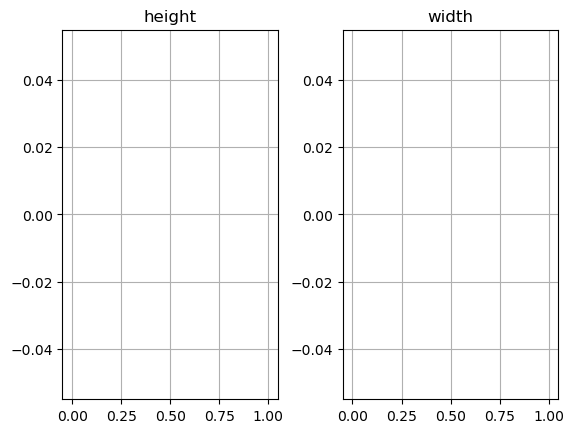

In [6]:
images_df[['height', 'width']].hist(bins=20)

In [7]:
images_df[['height', 'width']].describe()

,height,width
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


Images are not of same sizes, resizing them to 128*128px which would ensure quality of image as well(min: 134px)

In [8]:
images = np.array([cv2.resize(image, (128, 128)) for image in images])

In [10]:
plt.imshow(images[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
plt.imshow(images[100])

IndexError: index 100 is out of bounds for axis 0 with size 0

The quality of images seems to be acceptable.

# Adding flipped images

Improve the dataset by adding flipped images. As in a CT scan it doesn't matter from what side we will look at it, so our model should also handle that.Brain hemorrhage can and should be diagnosed just as well. By adding flipped images to dataset, we can greatly increase the accuracy of model.

IndexError: index 0 is out of bounds for axis 0 with size 0

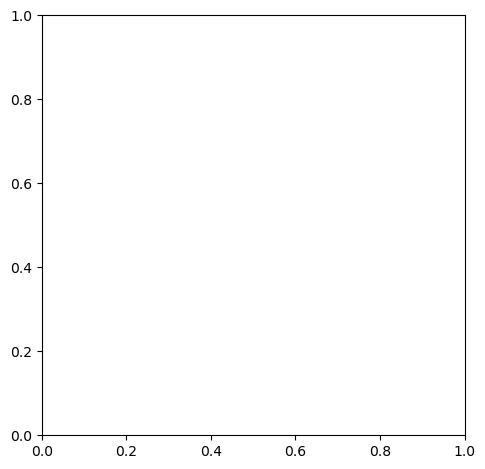

In [16]:
plt.figure(figsize=(12, 12))
for i, flip in enumerate([None, -1, 0, 1]):
    plt.subplot(221 + i)
    if flip is None:
        plt.imshow(images[0])
    else:
        plt.imshow(cv2.flip(images[0], flip))

Split data into train, validation and test subsets.

In [17]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
indicies = np.random.permutation(100)
train_true_idx, test_true_idx = indicies[:90], indicies[90:]
train_false_idx, test_false_idx = indicies[:90] + 100, indicies[90:] + 100
train_idx, test_idx = np.append(train_true_idx, train_false_idx), np.append(test_true_idx, test_false_idx)

train_validationX, train_validationY = images[train_idx], labels[train_idx]
testX, testY = images[test_idx], labels[test_idx]

print(train_validationX.shape, testX.shape)
print(train_validationY.shape, testY.shape)

IndexError: index 19 is out of bounds for axis 0 with size 0

In [19]:
# splitting train and validation sets
tr_len = train_validationX.shape[0]
train_val_split = int(tr_len*0.9)
indicies = np.random.permutation(tr_len)
train_idx, validation_idx = indicies[:train_val_split], indicies[train_val_split:]

trainX, trainY = train_validationX[train_idx], train_validationY[train_idx]
validationX, validationY = train_validationX[validation_idx], train_validationY[validation_idx]

print(trainX.shape, validationX.shape)
print(trainY.shape, validationY.shape)

NameError: name 'train_validationX' is not defined

In [20]:
import keras

AttributeError: module 'inspect' has no attribute 'ArgSpec'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import math

# Image augmentation

In [ ]:
train_image_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.,
    zoom_range=0.05,
    rotation_range=180,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    cval=0
)
validation_image_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.,
    zoom_range=0.05,
    rotation_range=90,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    cval=0)

In [21]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_image_data.flow(trainX, trainY, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

NameError: name 'train_image_data' is not defined

<Figure size 1200x1200 with 0 Axes>

# Building the model

In [ ]:
def check_accuracy(model, setX, actual, print_images=True):
    predicted = np.array([int(x[0] > 0.5) for x in model.predict(setX)])
    if print_images:
        rows = math.ceil(len(predicted)/10.)
        plt.figure(figsize=(20, 3 * rows))
        for i in range(len(predicted)):
            plt.subplot(rows, 10, i+1)
            plt.imshow(setX[i])
            plt.title("pred "+str(predicted[i])+" actual "+str(actual[i]))
        
    confusion = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = confusion.ravel()
    print("True positive:", tp, ", True negative:", tn,
          ", False positive:", fp, ", False negative:", fn)

    print("Total accuracy:", np.sum(predicted==actual) / len(predicted) * 100., "%")
    return (tn, fp, fn, tp)

In [ ]:
def simple_conv_model(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.4))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = simple_conv_model((128, 128, 3))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.summary()

# Training model

In [ ]:
model.fit_generator(train_image_data.flow(trainX, trainY, batch_size=128),
    steps_per_epoch=128,
    validation_data=validation_image_data.flow(validationX, validationY, batch_size=16),
    validation_steps=100,
    callbacks=[ModelCheckpoint("weights.h5", monitor='val_acc', save_best_only=True, mode='max')],
    epochs=8)

In [ ]:
check_accuracy(model, validationX/255., validationY)

In [ ]:
model.save("last-weights.h5")
model.load_weights("weights.h5")

In [ ]:
check_accuracy(model, trainX/255., trainY, False)

In [ ]:
check_accuracy(model, validationX/255., validationY)

The Model seems to show good results with keras with TensorFlow as backend, but one problem is False Negatives, which means that the Patient has Brain Haemorrhage but the model detects that teh person has a normal head.

# False negative result will kill patient
False positive result will be an inconvinience.


In [ ]:
def imbalance_set(coeff=2):
    imbalanced_trainX = []
    imbalanced_trainY = []
    for i, train_x in enumerate(trainX):
        def add_entry(x, y):
            imbalanced_trainX.append(x)
            imbalanced_trainY.append(y)

        add_entry(train_x, trainY[i])

        if(trainY[i] == 1):
            for j in range(coeff-1):
                add_entry(train_x, trainY[i])
    return (np.array(imbalanced_trainX), np.array(imbalanced_trainY))

imbalanced_trainX, imbalanced_trainY = imbalance_set(2)
print(imbalanced_trainX.shape, imbalanced_trainY.shape)

In [ ]:
def bigger_conv_model(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.4))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = bigger_conv_model((128, 128, 3))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

In [ ]:
hist = model.fit(imbalanced_trainX, imbalanced_trainY, validation_data=(validationX, validationY),
          callbacks=[ModelCheckpoint("weights-fna-model.hdf5", monitor='val_acc', save_best_only=True, mode='max')],
          batch_size=128, epochs=200)

In [ ]:
plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.fit_generator(train_image_data.flow(imbalanced_trainX, imbalanced_trainY, batch_size=128),
    steps_per_epoch=128,
    validation_data=validation_image_data.flow(validationX, validationY, batch_size=16),
    validation_steps=100,
    callbacks=[ModelCheckpoint("bigger_model_checkpoint_weights.h5", monitor='val_acc', save_best_only=True, mode='max')],
    epochs=12)

In [ ]:
check_accuracy(model, trainX/255., trainY, False)

In [ ]:
check_accuracy(model, validationX/255., validationY, False)

In [ ]:
model.save("bigger_model_latest_weights.h5")
model.load_weights("bigger_model_checkpoint_weights.h5")

In [ ]:
check_accuracy(model, trainX/255., trainY, False)

In [ ]:
check_accuracy(model, validationX/255., validationY, False)

# 85% of accuracy on validation set and 0 false negative

In [ ]:
check_accuracy(model, testX/255., testY)

Model showed good results.

Additional improvements could be made if image augmentation contained alterations of contrast.